# Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil
**Integrantes**:
- William Ávila R
- Luz Angela Rojas Prieto
- Milena Páramo
- Eliana Carolina Poveda.  

**Objetivo**  

Identificar el mejor modelo para la base de datos de evaluación de automóviles la cual relaciona directamente CAR (Variable Objetivo) con seis atributos de entrada (Variables predictoras): precio de compra, precio de mantenimiento, puertas, personas, lug_boot y seguridad. Se presentará un informe de rendimiento de cada uno de los modelos en la base de testeo y además identificaremos el sobreajuste (overfitting)

**El dataset, cuenta con 3 archivos:**

*car.data:* Este es el archivo principal que contiene los datos en sí. Es el archivo que se cargará y usará para análisis, entrenamiento, y prueba de modelos.   
*car.names:* Este archivo describe cada columna del archivo car.data y los valores que pueden tomar. Es una referencia que ayuda a entender los datos.   
*car.c45-names:* Este archivo contiene información sobre los nombres y valores de las columnas. Es similar a car.names y se usa para entender las características de cada variable en el conjunto de datos

Los registros de la base de datos "Car Evaluation" contiene un conjunto de datos diseñado para clasificar la aceptabilidad de automóviles en función de tres conceptos intermedios: PRECIO, TECNOLOGÍA, CONFORT (comodidad). Cada una de las siguientes variables se asocia con alguno de estos conceptos intermedios.

Variables del data-frame: 

**buying** (precio de compra): Representa el costo de compra del automóvil y tiene cuatro categorías: vhigh (muy alto), high (alto), med (medio) y low (bajo). 

**maint** (costo de mantenimiento): Indica el costo de mantenimiento del automóvil, también tiene cuatro categorías: vhigh (muy alto), high (alto), med (medio) y low (bajo). 

**doors** (número de puertas): Especifica el número de puertas del automóvil. Sus categorías: 2, 3, 4, o 5more (5 o más puertas) 

**persons** (capacidad de personas): Indica la cantidad de personas que el vehículo puede acomodar. Las categorías: 2, 4, more (+de 4 personas) 

**lug_boot** (tamaño del maletero): Indica tamaño del maletero en tres categorías: small (pequeño), med (mediano), big (grande). 

**safety** (nivel de seguridad): Indica el nivel de seguridad del automóvil y está clasificado en tres niveles: low (bajo), med (medio), high (alto) 

**class** (clasificación de aceptabilidad): Es la variable objetivo y determina la aceptabilidad del automóvil en cuatro categorías: unacc (inaceptable), acc (aceptable), good (bueno), vgood (muy bueno). 

La variable class es la variable objetivo, y sobre ella haremos una partición adecuada para realizar los procesos de entrenamiento y testeo, aplicando varios modelos de aprendizaje.

## Importar Base de Datos

Se definen los nombres de las columnas estaban en los archivos car.names y car.c45-names. Estos archivos describen cada variable y sus valores, proporcionando el contexto necesario para entender los datos en car.data. y posteriormente se carga el archivo car.data

In [69]:
import pandas as pd

# Ruta del archivo
file_path = r'D:\Acer\Download\Machine Learning\Taller 2\car.data'  

# Definir los nombres de las columnas según car.names o car.c45-names
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Cargar el archivo car.data en un DataFrame de pandas
df = pd.read_csv(file_path, names=column_names)



In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from pandas.api.types import CategoricalDtype

## Exploración de datos


In [71]:
#Primeros 5 registros del df
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [72]:
#Cantidad de columnas y filas
df.shape

(1728, 7)

In [73]:
#Nombre de las columnas
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [74]:
#Índice de los registros
df.index

RangeIndex(start=0, stop=1728, step=1)

In [75]:
# Estadísticas resumen
df.describe(include='all')

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


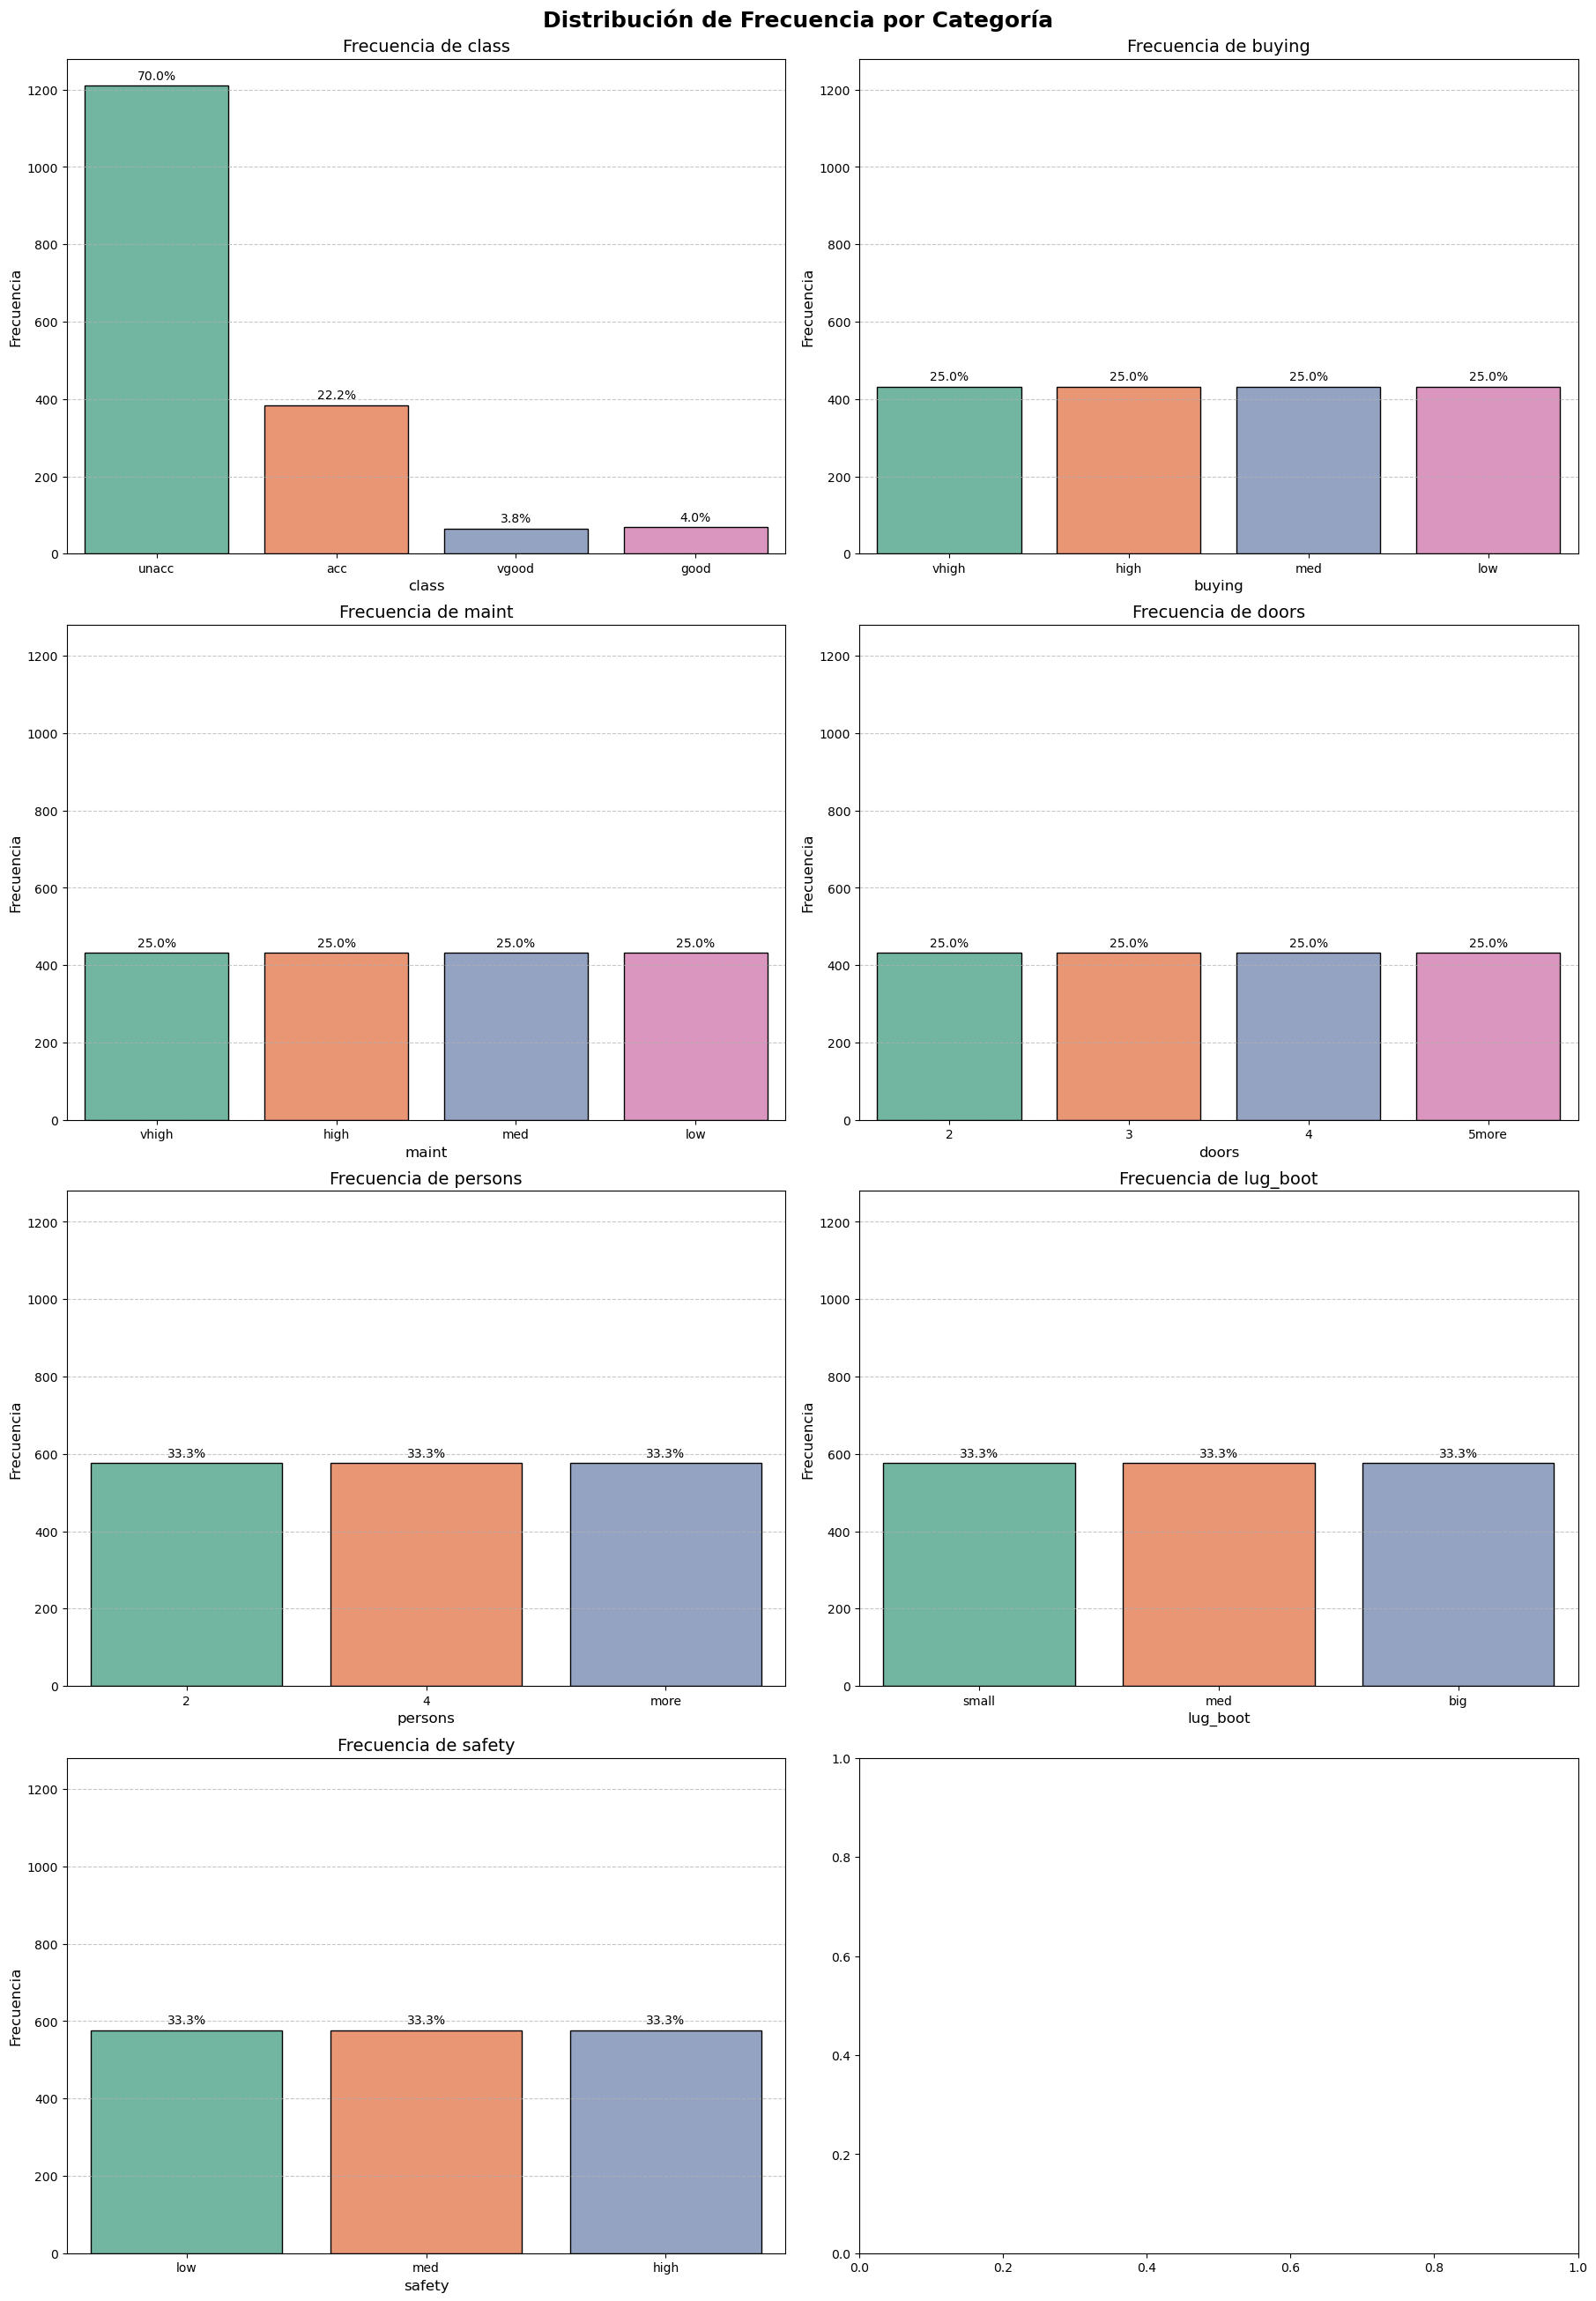

In [76]:
# Número de variables categóricas que queremos graficar
categorical_columns = ['class', 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Configuración de gráficos: 4 filas x 2 columnas, con ajuste de tamaño uniforme
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 26), constrained_layout=True)
fig.suptitle("Distribución de Frecuencia por Categoría", fontsize=18, fontweight='bold')

# Colores personalizados para cada variable
palettes = [sns.color_palette("Set2", n_colors=df[col].nunique()) for col in categorical_columns]

# Iterar sobre cada variable categórica y su respectivo eje
for i, col in enumerate(categorical_columns):
    row, col_index = divmod(i, 2)  # Obtener la fila y columna correspondientes
    sns.countplot(ax=axes[row, col_index], x=col, data=df, hue=col, palette=palettes[i], edgecolor='black', legend=False)
    axes[row, col_index].set_title(f'Frecuencia de {col}', fontsize=14)
    axes[row, col_index].set_xlabel(col, fontsize=12)
    axes[row, col_index].set_ylabel('Frecuencia', fontsize=12)
    axes[row, col_index].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Establecer el mismo límite de escala para todos los gráficos
    axes[row, col_index].set_ylim(0, 1280)
    
    # Agrega los porcentajes sobre cada barra para cada variable categórica
    total = len(df[col])
    for p in axes[row, col_index].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        axes[row, col_index].annotate(percentage, 
                                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                                      ha='center', va='center', 
                                      xytext=(0, 8), textcoords='offset points')

# Mostrar el gráfico
plt.show()

Dado que los gráficos de barra de cada variable no son informativos ya que las frecuencias son equilibradas, elegimos mostrar la distribución de las variables según la variable 'class'.

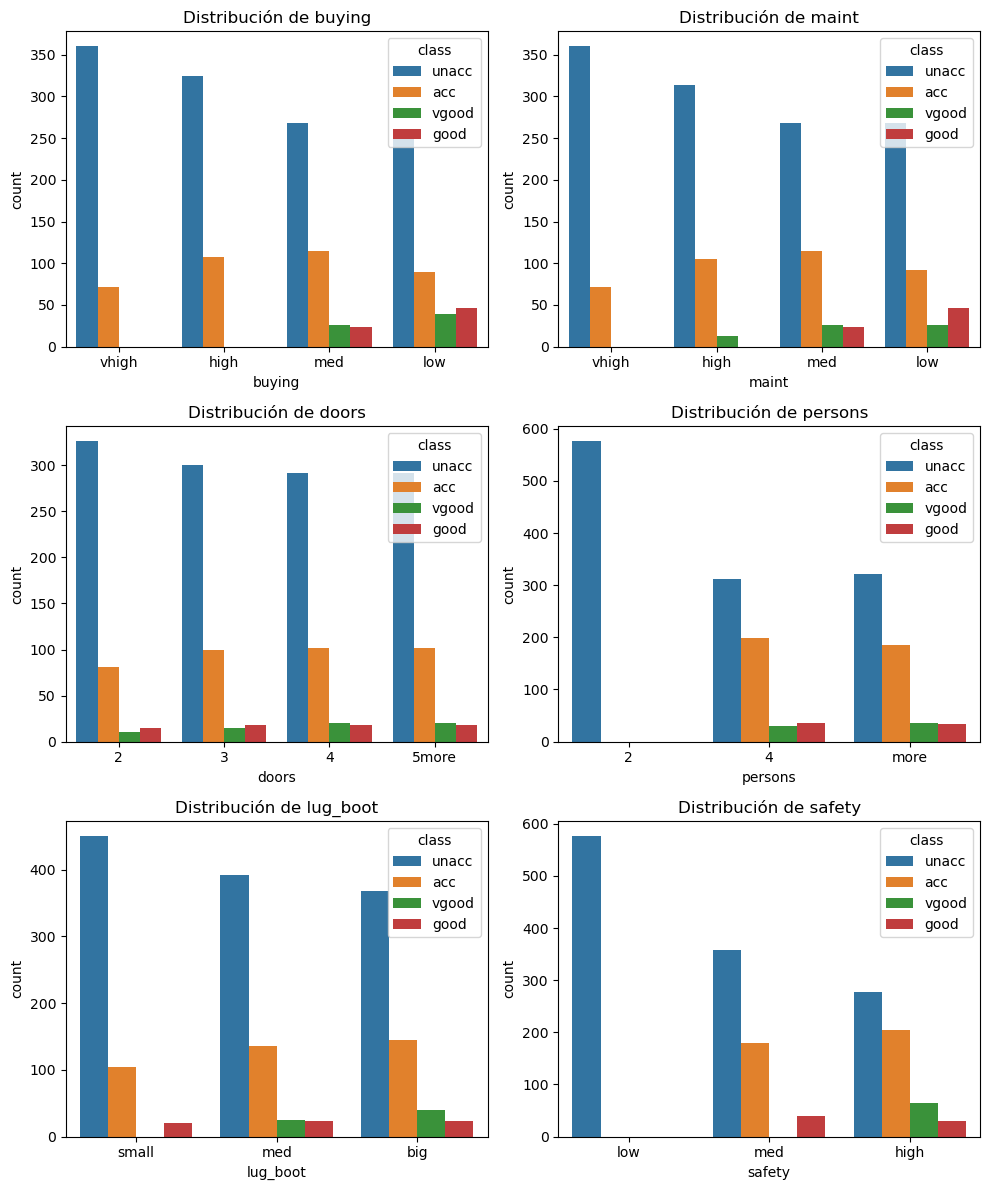

In [77]:
plt.figure(figsize=(10, 12))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df, x=col, hue="class")
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

## Preparación de datos para entrenar modelos.


### Valores Nulos

In [78]:
#Identificar valores nulos
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Convertir variables categóricas a númericas 


En primer lugar, asignaremos un valor numérico a cada categoría, esto es útil para que el modelo pueda manejar relaciones ordinales entre categorías y lo haremos ordenando cada categoría: 

#### **Class**: Car acceptability  

In [79]:
from pandas.api.types import CategoricalDtype

# Verificar valores únicos en la columna para asegurarnos de que coinciden con el orden deseado
print("Valores únicos en 'class':", df['class'].unique())

# Definir el orden personalizado para las categorías en la variable 'class'
orden_categorias = CategoricalDtype(categories=['unacc', 'acc', 'good', 'vgood'], ordered=True)

# Aplicar el orden a la variable 'class'
df['class'] = df['class'].astype(orden_categorias)

# Asignar códigos numéricos a cada categoría ordenada en una nueva columna
df['class_cod'] = df['class'].cat.codes

# Verificar que la columna 'class_cod' esté en el DataFrame
print("DataFrame con la variable 'class' ordenada y codificada:")
print(df[['class', 'class_cod']])

Valores únicos en 'class': ['unacc' 'acc' 'vgood' 'good']
DataFrame con la variable 'class' ordenada y codificada:
      class  class_cod
0     unacc          0
1     unacc          0
2     unacc          0
3     unacc          0
4     unacc          0
...     ...        ...
1723   good          2
1724  vgood          3
1725  unacc          0
1726   good          2
1727  vgood          3

[1728 rows x 2 columns]


#### **Buying**: Buying price

In [80]:
print(df['buying'].unique())
orden_categorias2 = CategoricalDtype(categories=['low', 'med', 'high', 'vhigh'], ordered=True)
df['buying'] = df['buying'].astype(orden_categorias2)
df['buying_cod'] = df['buying'].cat.codes
print("DataFrame con la variable 'buying' ordenada y codificada:")
print(df[['buying', 'buying_cod']])

['vhigh' 'high' 'med' 'low']
DataFrame con la variable 'buying' ordenada y codificada:
     buying  buying_cod
0     vhigh           3
1     vhigh           3
2     vhigh           3
3     vhigh           3
4     vhigh           3
...     ...         ...
1723    low           0
1724    low           0
1725    low           0
1726    low           0
1727    low           0

[1728 rows x 2 columns]


#### **Maint**: Price of the maintenance  

In [81]:
print(df['maint'].unique())
orden_categorias3 = CategoricalDtype(categories=['low', 'med', 'high', 'vhigh'], ordered=True)
df['maint'] = df['maint'].astype(orden_categorias3)
df['maint_cod'] = df['maint'].cat.codes
print("DataFrame con la variable 'maint' ordenada y codificada:")
print(df[['maint', 'maint_cod']])

['vhigh' 'high' 'med' 'low']
DataFrame con la variable 'maint' ordenada y codificada:
      maint  maint_cod
0     vhigh          3
1     vhigh          3
2     vhigh          3
3     vhigh          3
4     vhigh          3
...     ...        ...
1723    low          0
1724    low          0
1725    low          0
1726    low          0
1727    low          0

[1728 rows x 2 columns]


#### **Doors**: Number of doors  


In [82]:
df['doors'].unique()
df['doors_cod'] = df['doors'].replace({'5more': 5})
print(df['doors_cod'])

0       2
1       2
2       2
3       2
4       2
       ..
1723    5
1724    5
1725    5
1726    5
1727    5
Name: doors_cod, Length: 1728, dtype: object


#### **Persons**: Capacity in terms of persons to carry 

In [83]:
df['persons'].unique()
df['persons_cod'] = df['persons'].replace({'more': 6})
print(df['persons_cod'])

0       2
1       2
2       2
3       2
4       2
       ..
1723    6
1724    6
1725    6
1726    6
1727    6
Name: persons_cod, Length: 1728, dtype: object


#### **Lug_boot**:  The size of luggage boot 

In [84]:
print(df['lug_boot'].unique())
orden_categorias4 = CategoricalDtype(categories=['small', 'med', 'big',], ordered=True)
df['lug_boot'] = df['lug_boot'].astype(orden_categorias4)
df['lug_boot_cod'] = df['lug_boot'].cat.codes
print("DataFrame con la variable 'lug_boot' ordenada y codificada:")
print(df[['lug_boot', 'lug_boot_cod']])

['small' 'med' 'big']
DataFrame con la variable 'lug_boot' ordenada y codificada:
     lug_boot  lug_boot_cod
0       small             0
1       small             0
2       small             0
3         med             1
4         med             1
...       ...           ...
1723      med             1
1724      med             1
1725      big             2
1726      big             2
1727      big             2

[1728 rows x 2 columns]


#### **Safety**:  Estimated safety of the car

In [85]:
print(df['safety'].unique())
orden_categorias5 = CategoricalDtype(categories=['low', 'med', 'high',], ordered=True)
df['safety'] = df['safety'].astype(orden_categorias5)
df['safety_cod'] = df['safety'].cat.codes
print("DataFrame con la variable 'safety' ordenada y codificada:")
print(df[['safety', 'safety_cod']])

['low' 'med' 'high']
DataFrame con la variable 'safety' ordenada y codificada:
     safety  safety_cod
0       low           0
1       med           1
2      high           2
3       low           0
4       med           1
...     ...         ...
1723    med           1
1724   high           2
1725    low           0
1726    med           1
1727   high           2

[1728 rows x 2 columns]


#### Comprobar creación columnas

In [86]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class',
       'class_cod', 'buying_cod', 'maint_cod', 'doors_cod', 'persons_cod',
       'lug_boot_cod', 'safety_cod'],
      dtype='object')

#### Variables categóricas a númericas

In [87]:
# Seleccionar las columnas categóricas que necesitan codificación
categorical_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Convertir cada columna categórica en su versión codificada
for col in categorical_columns:
    df[f"{col}_cod"] = df[col].astype('category').cat.codes

# Verificar el resultado
print(df.head())

  buying  maint doors persons lug_boot safety  class  class_cod  buying_cod  \
0  vhigh  vhigh     2       2    small    low  unacc          0           3   
1  vhigh  vhigh     2       2    small    med  unacc          0           3   
2  vhigh  vhigh     2       2    small   high  unacc          0           3   
3  vhigh  vhigh     2       2      med    low  unacc          0           3   
4  vhigh  vhigh     2       2      med    med  unacc          0           3   

   maint_cod  doors_cod  persons_cod  lug_boot_cod  safety_cod  
0          3          0            0             0           0  
1          3          0            0             0           1  
2          3          0            0             0           2  
3          3          0            0             1           0  
4          3          0            0             1           1  


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   buying        1728 non-null   category
 1   maint         1728 non-null   category
 2   doors         1728 non-null   object  
 3   persons       1728 non-null   object  
 4   lug_boot      1728 non-null   category
 5   safety        1728 non-null   category
 6   class         1728 non-null   category
 7   class_cod     1728 non-null   int8    
 8   buying_cod    1728 non-null   int8    
 9   maint_cod     1728 non-null   int8    
 10  doors_cod     1728 non-null   int8    
 11  persons_cod   1728 non-null   int8    
 12  lug_boot_cod  1728 non-null   int8    
 13  safety_cod    1728 non-null   int8    
dtypes: category(5), int8(7), object(2)
memory usage: 48.2+ KB


## Base de entrenamiento y testeo y resultados de rendimiento por modelo


Considerando que la regresión logística estándar es para variables binarias. En este caso aplicaremos una regresión logística multinomial (multiclase) y un modelo Naive Bayes (CategoricalNB) ya que consideramos son los que más se ajustan a la naturaleza de los datos.

### **Regresión logística multinomial (multiclase)**

#### **Regresión logística 1: RL1**

In [89]:
#Definir las variables dependientes e independientes 
X = df[['buying_cod', 'maint_cod', 'doors_cod', 'persons_cod', 'lug_boot_cod', 'safety_cod']]
y = df['class_cod']
#División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# **Crear y entrenar el modelo de regresión logística multinomial**
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200, multi_class='multinomial')

#### **Resultado rendimiento RL1**

In [90]:
# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8121387283236994
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       235
           1       0.67      0.55      0.61        83
           2       0.67      0.36      0.47        11
           3       0.76      0.76      0.76        17

    accuracy                           0.81       346
   macro avg       0.74      0.65      0.68       346
weighted avg       0.80      0.81      0.80       346



#### **Interpretación RL1**:
Según el reporte de clasificación tenemos una precisión general del 81% (el modelo clasifica correctamente el 81% de los casos en el conjunto de prueba.); sin embargo, esta alta precisión del modelo se debe al buen ajuste que tiene la categoría **unacc** de 93% considerando el soporte de 235 observaciones que es mayoritario, por este motivo el rendimiento varía significativamente entre las categorías.   

Por esta razón consideramos necesario que cada clase en y (class: Car acceptance) esté representada de manera proporcional tanto en el conjunto de entrenamiento como en el de prueba (manteniendo un 25% de cada categoría), para lograr esta consistencia agregamos el paramétro **stratify** en **train_test_split**. Lo anterior, con el fin de reducir el sesgo del modelo hacia la categoría mayoritaria.


#### **Regresión Logística 2: RL2**

Reduciendo el sesgo del modelo hacia la categoría mayoritaria:

In [91]:

# División de los datos en entrenamiento y prueba de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear y entrenar el modelo de regresión logística multinomial
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)



LogisticRegression(max_iter=200, multi_class='multinomial')

#### **Resultado rendimiento RL2**

In [92]:
# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8005780346820809
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       242
           1       0.61      0.55      0.58        77
           2       0.43      0.21      0.29        14
           3       0.78      0.54      0.64        13

    accuracy                           0.80       346
   macro avg       0.67      0.56      0.60       346
weighted avg       0.78      0.80      0.79       346



#### **Interpretación RL2**

Aunque en este caso mejora la precisión del modelo 80% es evidente que sigue existiendo un desbalance en las clases puede que el modelo tenga problemas para reconocer las clases menos representadas influenciado por la cantidad de datos en la clase mayoritaria. La decisión es revisar si con un conjunto de entrenamiento más grande tenemos un mejor rendimiento para lo que generamos a continuación un cálculo de los errores de validación y entrenamiento para diferentes tamaños de entrenamiento

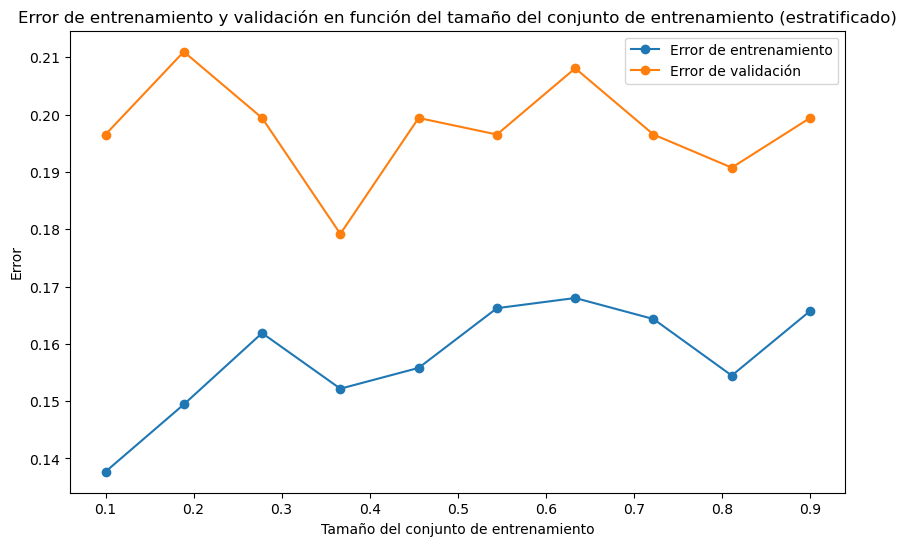

In [93]:

# Listas para almacenar errores de entrenamiento y validación
train_errors = []
val_errors = []

# Define el rango de tamaños de entrenamiento, sin incluir 1.0 para evitar el error
train_sizes = np.linspace(0.1, 0.9, 10)  # Rango de 10% a 90% del conjunto de entrenamiento

# Bucle para calcular errores en función del tamaño del conjunto de entrenamiento
for train_size in train_sizes:
    # Divide el conjunto de datos en el tamaño de entrenamiento especificado
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42, stratify=y_train)
    
    # Entrena el modelo en el subconjunto de datos de entrenamiento
    model = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs', random_state=42)
    model.fit(X_train_subset, y_train_subset)
    
    # Predicciones en los conjuntos de entrenamiento y validación
    y_train_pred = model.predict(X_train_subset)
    y_val_pred = model.predict(X_test)
    
    # Calcula el error como 1 - accuracy
    train_error = 1 - accuracy_score(y_train_subset, y_train_pred)
    val_error = 1 - accuracy_score(y_test, y_val_pred)
    
    # Guarda los errores
    train_errors.append(train_error)
    val_errors.append(val_error)

# Grafica los errores
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="Error de entrenamiento", marker='o')
plt.plot(train_sizes, val_errors, label="Error de validación", marker='o')
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error")
plt.title("Error de entrenamiento y validación en función del tamaño del conjunto de entrenamiento (estratificado)")
plt.legend()
plt.show()

De acuerdo a la gráfica anterior podemos evidenciar que un conjunto de entrenamiento de tamaño 0.35 es bueno, ya que en este punto la diferencia entre el error de entrenamiento y error de validación es mínimo pero no igual, sabemos que un tamaño de entrenamiento demasiado grande como 0.9 punto en el cual también se cumple esta premisa podría llevar a que el modelo se ajuste demasiado a los datos de entrenamiento y no generalice bien, por lo que evaluaremos el modelo con un conjunto más grande de entrenamiento a continuación:

#### **Regresión Logística 3: RL3**

In [101]:
#Definir las variables dependientes e independientes 
X = df[['buying_cod', 'maint_cod', 'doors_cod', 'persons_cod', 'lug_boot_cod', 'safety_cod']]
y = df['class_cod']
#División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
# **Crear y entrenar el modelo de regresión logística multinomial**
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model3.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

#### **Resultado rendimiento RL3**

In [102]:
# Realizar predicciones y evaluar el modelo
y_pred = model3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8231404958677686
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       421
           1       0.65      0.61      0.63       137
           2       0.57      0.36      0.44        22
           3       0.78      0.72      0.75        25

    accuracy                           0.82       605
   macro avg       0.72      0.65      0.68       605
weighted avg       0.82      0.82      0.82       605



#### **Interpretación RL3**

Aunque se aumentó el tamaño del conjunto de entrenamiento el sesgo hacia la categoría **unacc** persiste por lo que aplicaremos el submuestreo al conjunto de entrenamiento esto con el fin de reducir el número de ejemplos en la categoría mayoritaria y de esta manera lograr un balance entre las categorías.

#### **Regresión Logística 4: RL4**:

A continuación se aplica el método undersampling, que reduce los ejemplos de la clase mayoritaria para equilibrar el dataset, usando técnicas como RandomUnderSampler. Esto busca reducir el sesgo hacia la clase mayoritaria, aunque puede llevar a una pérdida de información.

In [96]:
from imblearn.under_sampling import RandomUnderSampler

# Definir las variables independientes (X) y la variable objetivo (y)
X = df[['buying_cod', 'maint_cod', 'doors_cod', 'persons_cod', 'lug_boot_cod', 'safety_cod']]
y = df['class_cod']

# Dividir los datos en conjuntos de entrenamiento y prueba, utilizando estratificación para mantener el balance de clases en el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el objeto RandomUnderSampler para realizar el submuestreo
undersample = RandomUnderSampler(random_state=42)

# Aplicar el submuestreo al conjunto de entrenamiento
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Crear y entrenar el modelo de regresión logística con el conjunto de datos submuestreado
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
model.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



#### **Resultado rendimiento RL4**

In [97]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.7485549132947977

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83       242
           1       0.57      0.66      0.61        77
           2       0.43      0.93      0.59        14
           3       0.48      0.92      0.63        13

    accuracy                           0.75       346
   macro avg       0.60      0.82      0.66       346
weighted avg       0.80      0.75      0.76       346



Como podemos evidenciar la precisión se reduce a 0.74 y el F1 Score a 0.66, por lo que no obtenemos el resultado esperado con la aplicación del método **undersampling** .

#### **Regresión Logística 5:  RL5**

A continuación se aplica el método oversampling el cual incrementa los ejemplos de la clase minoritaria para equilibrar el dataset, comunmente usando técnicas como SMOTE, que crea ejemplos sintéticos con el objetivo de reducir el sesgo hacia la clase mayoritaria y mejorar el rendimiento del modelo.

In [98]:
from imblearn.over_sampling import SMOTE

# Definir las variables independientes (X) y la variable objetivo (y)
X = df[['buying_cod', 'maint_cod', 'doors_cod', 'persons_cod', 'lug_boot_cod', 'safety_cod']]
y = df['class_cod']

# Dividir los datos en conjuntos de entrenamiento y prueba, utilizando estratificación para mantener el balance de clases en el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el objeto SMOTE para realizar el sobremuestreo
smote = SMOTE(random_state=42)

# Aplicar el sobremuestreo al conjunto de entrenamiento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo de regresión logística multinomial con el conjunto de datos sobremuestreado
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
model.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



#### **Resultado rendimiento RL5**

In [99]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.7485549132947977

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       242
           1       0.53      0.65      0.58        77
           2       0.41      0.64      0.50        14
           3       0.41      0.85      0.55        13

    accuracy                           0.75       346
   macro avg       0.57      0.73      0.62       346
weighted avg       0.80      0.75      0.77       346



Como podemos evidenciar la precisión se reduce a 0.74 y el F1 Score a 0.62, por lo que no obtenemos el resultado esperado con la aplicación del método **oversampling** .

### **Naive Bayes (CategoricalNB)**

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Definir las variables independientes (X) y la variable objetivo (y)
X = df[['buying_cod', 'maint_cod', 'doors_cod', 'persons_cod', 'lug_boot_cod', 'safety_cod']]
y = df['class_cod']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Naive Bayes (CategoricalNB)
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = nb_model.predict(X_test)

# Imprimir resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.815028901734104
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       235
           1       0.63      0.54      0.58        83
           2       0.57      0.36      0.44        11
           3       1.00      0.35      0.52        17

    accuracy                           0.82       346
   macro avg       0.77      0.56      0.62       346
weighted avg       0.81      0.82      0.80       346



### **Conclusión**

Este notebook presenta un análisis para evaluar la calidad de diferentes modelos de clasificación en el contexto de una clasificación de carros. Se implementaron dos modelos distintos, en la regresión logística multimodal se varió el tamaño del conjunto de entrenamiento con el objetivo de realizar una partición adecuada de la base y se analizaron los errores de entrenamiento en comparación con los errores de validación. Esto permitió identificar el tamaño del conjunto de entrenamiento donde el modelo alcanza un buen balance entre precisión y generalización, evitando el sobreajuste.

De otro lado, se analizaron las métricas de precisión y F1 Score entre el modelo de regresión y el modelo Naive Bayes, encontrando que el mejor rendimiento general lo tiene el modelo de regresión multimodal con un tamaño del conjunto de entrenamiento de 0.35, una precisión de 0.82 y F1 Score 0.68 que indica un mejor rendimiento en todas las clases.

